<a href="https://colab.research.google.com/github/jcsnuesi/visualizacion_data/blob/main/Ejercicio_de_visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Global import of cocoa beans.xlsx')
df

,Region,Year,Import in tonnes
0,Asia & Oceania,2015.0,565000.0
1,Asia & Oceania,2016.0,592000.0
2,Asia & Oceania,2017.0,866000.0
3,Asia & Oceania,2018.0,927000.0
4,Asia & Oceania,2019.0,924000.0
5,Europe,2015.0,1997000.0
6,Europe,2016.0,2219000.0
7,Europe,2017.0,2444000.0
8,Europe,2018.0,2554000.0
9,Europe,2019.0,2500000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            15 non-null     object 
 1   Year              15 non-null     float64
 2   Import in tonnes  15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 488.0+ bytes


In [126]:
df1 = df
df1.Year = df1.Year.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            15 non-null     object 
 1   Year              15 non-null     int64  
 2   Import in tonnes  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 488.0+ bytes


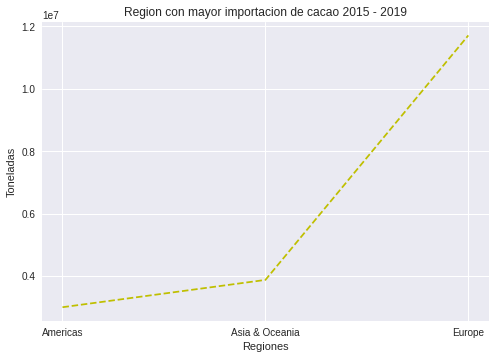

In [80]:
df_region = df1.Region == 'Americas'
df1.groupby(["Region"])['Import in tonnes'].sum()
x =  np.array(df1.groupby(["Region"])['Import in tonnes'].sum().index)
y =  np.array(df1.groupby(["Region"])['Import in tonnes'].sum().values)
plt.plot(x,y, 'y--')
plt.title('Region con mayor importacion de cacao 2015 - 2019')
plt.ylabel('Toneladas')
plt.xlabel('Regiones')
plt.show()



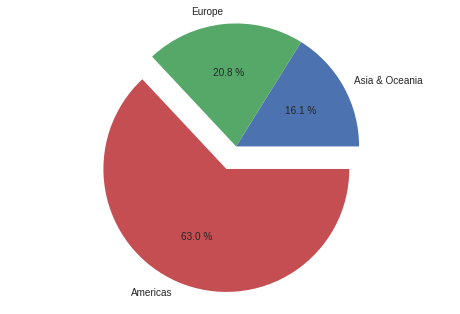

In [121]:
x = np.array(df1.groupby(['Region'])['Import in tonnes'].sum())
desfase = [0,0,0.2]
plt.pie(x, labels=df1['Region'].unique(), autopct="%0.1f %%", explode=desfase)
# plt.pie(manzanas, labels=nombres, autopct="%0.1f %%", explode=desfase)
plt.axis('equal')
plt.show()

<BarContainer object of 15 artists>

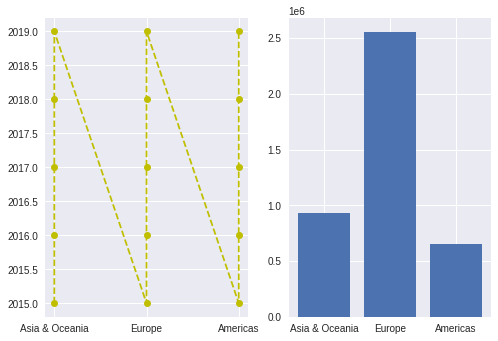

In [350]:
tones_years = df1.loc[:,['Import in tonnes','Year']].sort_values(by='Year',ascending=False)

fig, axis =  plt.subplots(nrows=1, ncols=2) 
axis[0].plot(df1['Region'],df1['Year'], 'yo--')
axis[1].bar(df1['Region'], df1['Import in tonnes'])



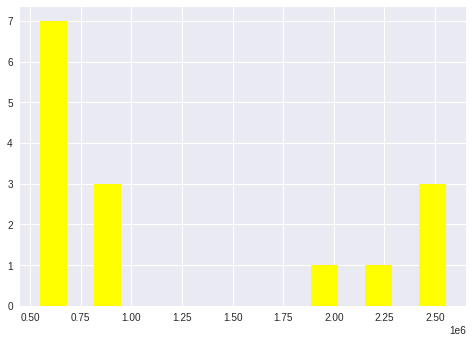

In [367]:
plt.hist(df1['Import in tonnes'], bins=len(df1['Import in tonnes'].index), orientation='vertical', color='yellow')
plt.show()